<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analysis-of-selected-funds" data-toc-modified-id="Analysis-of-selected-funds-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analysis of selected funds</a></span><ul class="toc-item"><li><span><a href="#Number-of-unique-port_nos-and-fund_nos" data-toc-modified-id="Number-of-unique-port_nos-and-fund_nos-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Number of unique port_nos and fund_nos</a></span></li><li><span><a href="#Number-of-unique-funds-per-year" data-toc-modified-id="Number-of-unique-funds-per-year-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Number of unique funds per year</a></span></li><li><span><a href="#Distribution-by-number-of-observations-per-fund" data-toc-modified-id="Distribution-by-number-of-observations-per-fund-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Distribution by number of observations per fund</a></span></li><li><span><a href="#Take-only-the-end-of-the-year-observation-per-fund" data-toc-modified-id="Take-only-the-end-of-the-year-observation-per-fund-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Take only the end of the year observation per fund</a></span></li><li><span><a href="#Distribution-by-lipper_class" data-toc-modified-id="Distribution-by-lipper_class-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Distribution by lipper_class</a></span></li><li><span><a href="#How-often-do-lipper_classes-change?" data-toc-modified-id="How-often-do-lipper_classes-change?-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>How often do lipper_classes change?</a></span></li></ul></li></ul></div>

# Analysis of selected funds

Main insights:
    - ~3700 unique funds over the complete timeframe
    - Strong break in 2010 (few observations before)
    - ~2500 unique funds per year
    - ~6% of funds change their lipper class over the complete timeframe
    

In [48]:
import feather

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Convert to date format
year = 2016

In [50]:
path = '../data/processed/row_info.feather'
info_df = feather.read_dataframe(path)

In [51]:
#info_df = info_df.query('year == @year')

In [52]:
info_df.sample()

,crsp_fundno,crsp_portno,fund_name,report_dt,lipper_class,cap_class,style_class,year,row
3522,15132,1022288,Carillon Series Trust: Carillon Eagle Small Ca...,2014-12-31,SCGE,SC,G,2014,3522


## Number of unique port_nos and fund_nos

In [53]:
info_df['report_dt'].describe()

count                   20624
unique                     17
top       2010-12-31 00:00:00
freq                     2371
first     2002-12-31 00:00:00
last      2018-12-31 00:00:00
Name: report_dt, dtype: object

In [54]:
print(info_df['crsp_portno'].nunique())
print(info_df['crsp_fundno'].nunique())

3745
3745


## Number of unique funds per year

#### Something seems odd
Break in 2009 not clear

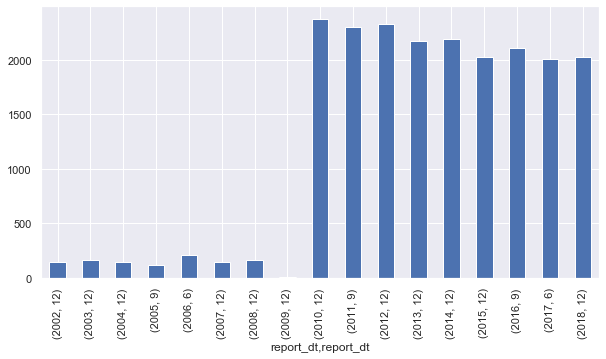

In [55]:
# Analysis of selected funds
sns.set()
## Distribution by date(info_df["report_dt"]
(info_df["crsp_portno"]
    .groupby([
         info_df["report_dt"].dt.year,
         info_df["report_dt"].dt.month
     ])
     .nunique()
     .plot(kind="bar",
           color = 'b',
           figsize=(10,5)))

## Distribution by number of observations per fund 

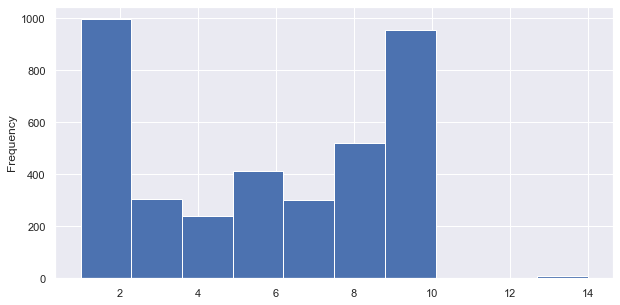

In [56]:
(info_df["crsp_portno"]
     .groupby([
         info_df["crsp_portno"],
     ])
     .count()
     .plot(kind="hist",
           bins = 10,
           color = 'b',
           figsize=(10,5)))

## Take only the end of the year observation per fund

In [57]:
index = (info_df
     .assign(year = info_df["report_dt"].dt.year)
     .groupby(['crsp_portno','year'])
     [['crsp_portno','report_dt']]
     .tail(1)
     .index)

In [58]:
info_df = info_df.loc[index]

## Distribution by lipper_class

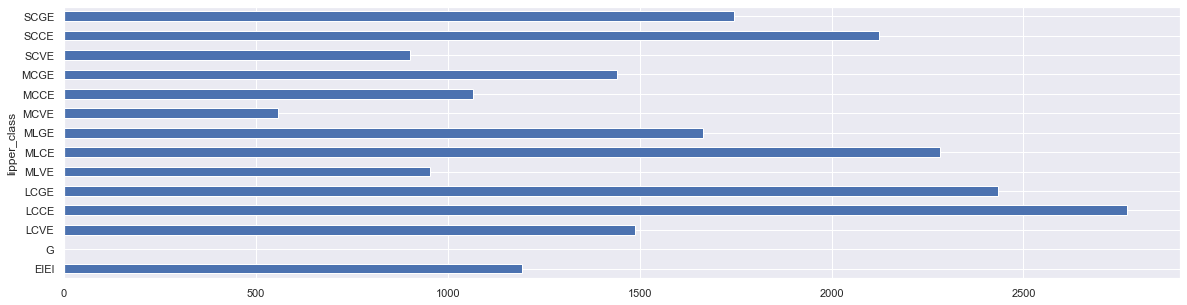

In [59]:
(info_df['crsp_portno']
     .groupby([
         info_df["lipper_class"],
     ])
     .count()
#     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(20,5)))

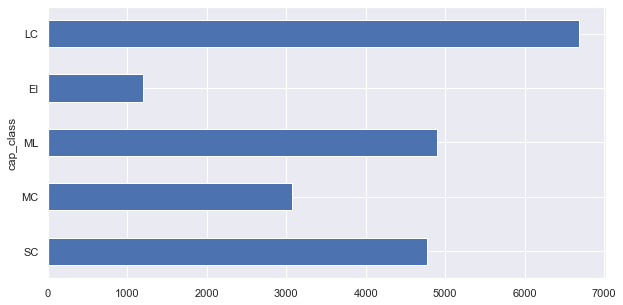

In [60]:
(info_df['crsp_portno']
     .groupby([
         info_df['cap_class'],
     ])
     .count()
     .plot(kind='barh',
           color = 'b',
           figsize=(10,5)))

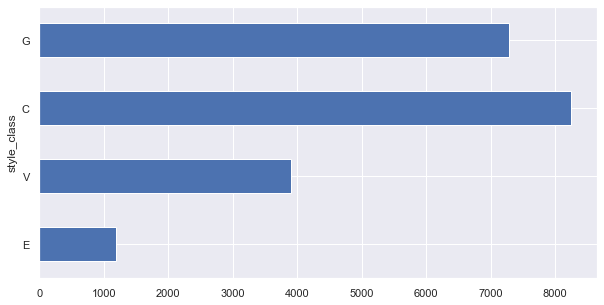

In [61]:
(info_df['crsp_portno']
     .groupby([
         info_df['style_class'],
     ])
     .count()
     .plot(kind='barh',
           color = 'b',
           figsize=(10,5)))

## How often do lipper_classes change?


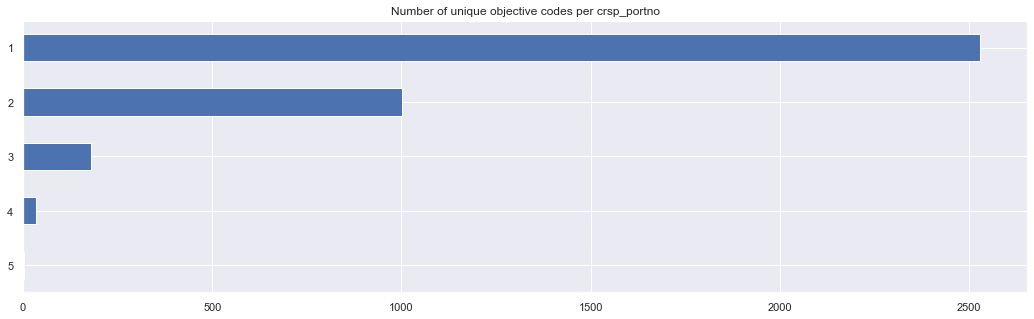

In [62]:
obj_per_portno = info_df[['crsp_portno','lipper_class']]
ax = (obj_per_portno['lipper_class']
    .groupby([
        obj_per_portno["crsp_portno"]
    ])
    .nunique()
    .value_counts()
    .sort_values()
    .plot(kind='barh',
          color = 'b',
          figsize=(18,5),
          title='Number of unique objective codes per crsp_portno')
)

In [63]:
lagged_class = info_df[['crsp_portno','report_dt','lipper_class']]

lagged_class = lagged_class.assign(lag_lipper_class = lagged_class.lipper_class.shift())
lagged_class = lagged_class.dropna()

mask = lagged_class.groupby(by = 'crsp_portno').head(1).index
lagged_class = lagged_class[~lagged_class.index.isin(mask)]

round(pd.crosstab(lagged_class.lipper_class, lagged_class.lag_lipper_class, normalize = 'all') * 100,2)

lag_lipper_class,EIEI,LCVE,LCCE,LCGE,MLVE,MLCE,MLGE,MCVE,MCCE,MCGE,SCVE,SCCE,SCGE
lipper_class,,,,,,,,,,,,,
EIEI,5.71,0.03,0.02,0.01,0.05,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.00
LCVE,0.05,6.39,0.56,0.01,0.20,0.10,0.01,0.00,0.00,0.00,0.00,0.00,0.00
LCCE,0.02,0.31,12.09,0.29,0.04,0.48,0.09,0.00,0.00,0.00,0.00,0.00,0.00
LCGE,0.00,0.00,0.24,10.94,0.00,0.06,0.45,0.00,0.01,0.00,0.00,0.00,0.00
MLVE,0.00,0.41,0.07,0.01,3.63,0.30,0.01,0.10,0.04,0.00,0.00,0.00,0.00
MLCE,0.01,0.07,0.60,0.11,0.27,9.11,0.33,0.05,0.21,0.04,0.01,0.02,0.00
MLGE,0.00,0.00,0.02,0.52,0.04,0.38,6.83,0.00,0.02,0.35,0.00,0.00,0.00
MCVE,0.01,0.00,0.00,0.00,0.09,0.04,0.00,2.18,0.27,0.01,0.07,0.02,0.00
MCCE,0.00,0.00,0.01,0.00,0.05,0.24,0.04,0.33,4.23,0.17,0.01,0.11,0.01


In [64]:
lagged_class = info_df[['crsp_portno','report_dt','style_class']]

lagged_class = lagged_class.assign(lag_style_class = lagged_class.style_class.shift())
lagged_class = lagged_class.dropna()

mask = lagged_class.groupby(by = 'crsp_portno').head(1).index
lagged_class = lagged_class[~lagged_class.index.isin(mask)]

pd.crosstab(lagged_class.style_class, lagged_class.lag_style_class)

lag_style_class,E,V,C,G
style_class,,,,
E,963,15,5,5
V,11,2858,316,6
C,6,305,6182,232
G,0,6,211,5757


In [65]:
lagged_class = info_df[['crsp_portno','report_dt','cap_class']]

lagged_class = lagged_class.assign(lag_cap_class = lagged_class.cap_class.shift())
lagged_class = lagged_class.dropna()

mask = lagged_class.groupby(by = 'crsp_portno').head(1).index
lagged_class = lagged_class[~lagged_class.index.isin(mask)]

round(pd.crosstab(lagged_class.cap_class, lagged_class.lag_cap_class, margins = True, normalize= 'all') *100,2)

lag_cap_class,SC,MC,ML,EI,LC,All
cap_class,,,,,,
SC,22.88,0.44,0.05,0.01,0.00,23.38
MC,0.33,13.79,0.76,0.01,0.01,14.89
ML,0.03,0.81,20.90,0.01,1.80,23.54
EI,0.01,0.02,0.05,5.71,0.07,5.85
LC,0.00,0.01,1.42,0.08,30.84,32.34
All,23.24,15.07,23.18,5.81,32.71,100.00


In [66]:
pd.crosstab(lagged_class.cap_class, lagged_class.lag_cap_class, margins = True)

lag_cap_class,SC,MC,ML,EI,LC,All
cap_class,,,,,,
SC,3861,74,9,2,0,3946
MC,56,2327,128,1,1,2513
ML,5,137,3527,1,303,3973
EI,1,4,9,963,11,988
LC,0,1,239,13,5205,5458
All,3923,2543,3912,980,5520,16878


### Fund names